## Chapter 5

### SVM

* 다목적 머신러닝 모델, 복잡한 분류 문제에 잘 맞으며 작거나 중간 크기의 데이터셋에 적합
* 선형 및 비선형 분류, 회귀 등 다양하게 사용가능

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

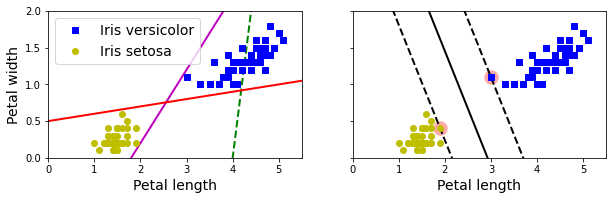

In [3]:
# from https://github.com/rickiepark/handson-ml2/blob/master/05_support_vector_machines.ipynb
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

> * 왼쪽 그래프(모델은 만든 것이 아닌 임의의 선을 그은 것)에서 점선은 클래스를 분류하지 못하고 있고, 두 실선은 샘플에 너무 가까워 새로운 샘플에 대해서는 잘 동작하지 못함.
> * 오른쪽 그래프(SVM)의 실선은 제일 가까운 훈련 샘플로부터 최대한 멀리 떨어져있으므로 새로운 데이터에 대해서도 잘 적용됨
>   * 라지 마진 분류(large margin classification) 라고도 함.
* 두 점선 밖에 샘플을 추가해도 결정 경계(실선)에는 영향을 미치지 않고, 점선 경계선에 위치한 샘플에 의해서 결정됨. 이러한 샘플을 서포트 벡터(support vector)라고 함.
* 스케일링에 민감하므로 StandardScaler등을 사용하는 것이 좋음.

* 모든 샘플이 도로(두 점선 안쪽 영역) 바깥에 올바르게 분류되어있다면 이를 하드 마진 분류(hard margin classification)라고 함.
  * 데이터가 선형적으로 구분되어있어야만 제대로 작동.
  * 이상치에 민감함.

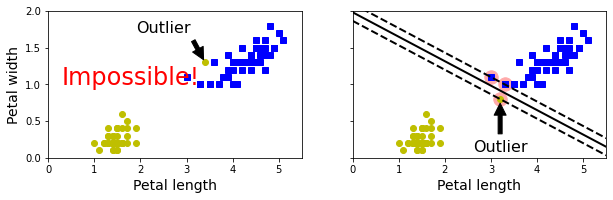

In [4]:
# from https://github.com/rickiepark/handson-ml2/blob/master/05_support_vector_machines.ipynb
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

> * 왼쪽은 hard margin을 찾는 것이 불가능하고, 오른쪽은 일반화가 잘되지 않은 모습

* 해결을 위해 도로의 폭을 가능한 넓게 유지하는 것과, 마진 오류(샘플이 도로 중간이나 반대쪽에 위치하는 경우) 사이의 균형을 잘 잡은 소프트 마진 분류(soft margin classification)가 필요.
  * hyperparameter C에 의해 결정됨(C가 작아지면 마진 오류가 많아지지만 도로의 폭이 넓어짐)
  * 모델이 과대적합이라면 C를 감소시켜 모델을 규제할 수 있음.

In [6]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                     # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)    # label: Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

* LinearSVC는 클래스에 대한 확률을 제공하지는 않음.(<code>predict_proba()</code>가 없음.)
  * 규제에 편향을 포함시키므로 훈련 세트에서 평균을 빼서 중앙에 맞춰야 함(StandardScaler사용)
  * 훈련 샘플보다 특성이 많지 않다면 <code>dual=False</code>를 지정하는 것이 좋음.
* LinearSVC대신 <code>SVC(kernel="linear", ... )</code>와 같이 사용하거나, <code>SGDClassifier(loss="hinge", alpha=1/(m*C))</code>와 같이 사용가능(경사 하강법을 사용하고, 빠르지는 않지만 데이터셋이 커서 메모리에 올릴 수 없거나 온라인 학습 등에 사용가능)

### 비선형 SVM

* 비선형 데이터셋을 다루기 위해서는 다항 특성과 같은 특성을 더 추가하는 방법이 있음.

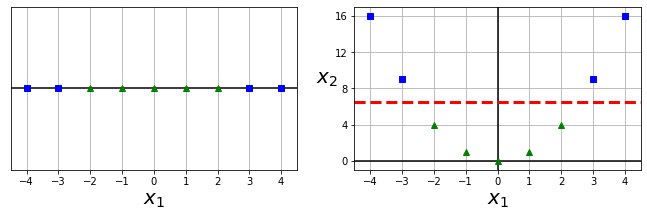

In [8]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

> * 왼쪽은 선형으로는 구분이 불가능하지만, 두 번째 특성 $ x_2=(x_1)^2 $ 를 추가하면 선형으로(점선) 구분가능해짐

In [32]:
# 두 개의 반달 모양 데이터셋인 moons 데이터셋을 SVC를 사용해 분류
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")),
])

polynomial_svm_clf.fit(X, y)

d:\pythonenv\mlenv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

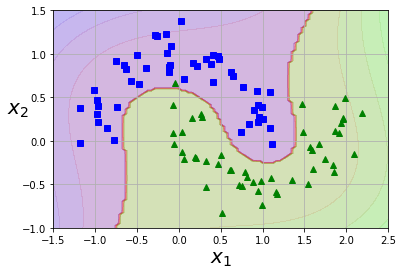

In [16]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

* 다항식 특성 추가는 간단하고 잘 작동하지만, 차수가 낮다면 복잡한 데이터셋을 잘 표현하지 못하고, 차수가 높다면 모델이 느려짐
* SVM 사용 시, 커널 트릭(kernel trick)을 적용하여 실제로는 특성을 추가하지 않으면서도 특성을 추가한 것과 같은 효과를 얻을 수 있음.

In [17]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("Scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),        # 3차 다항식 커널. coef0 : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절.
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [22]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))  # 10차
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

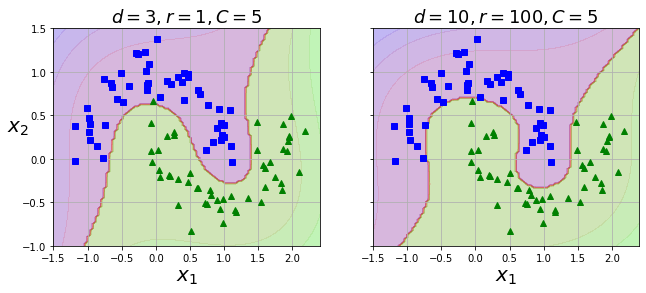

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

* 비선형 특성을 다루는 또 다른 방법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수(similarity function)로 계산한 특성을 추가하는 것.
  * ex) 아래의 1차원 데이터셋에서 두개의 랜드마크 $ x_1=-2, x_1=1 $ 을 추가하고, $ \gamma=0.3 $ 인 가우시안 방사 기저 함수(radial basis function, RBF)를 유사도 함수로 정의.
    * RBF : $ \phi_{\gamma}(\mathbf{x},\ell) = \exp\left(-\gamma\parallel\mathbf{x}-\ell\parallel^2\right) $ . 함수의 값은 0부터 1까지의 값을 가지는 종 모양의 형태를 띄며, 랜드마크에 가까울수록 1에 가까워지게 됨.
    * $ \ell $ 값이 랜드마크 지점, $ \gamma $ 값은 0보다 커야 하며 값이 작을수록 폭이 넓은 종 모양이 됨.
    * 샘플 -1은 첫 번째 랜드마크에서 1만큼 떨어져 있고 두 번째 랜드마크에서 2만큼 떨어져 있으므로 새로운 특성은 $ x_2=\exp(-0.3\times1^2)\approx0.74, x_3=\exp(-0.3\times2^2)\approx0.30 $이 됨.
* 랜드마크를 선택하는 간단한 방법은 데이터셋의 모든 샘플 위치에 랜드마크를 설정하는 것. 차원이 매우 커지고 선형적으로 구분될 가능성이 높지만, n개의 특성을 가진 m개의 샘플이, m개의 특성을 가진 m개의 샘플이 됨. 즉, 아주 많은 특성이 만들어지게 됨.

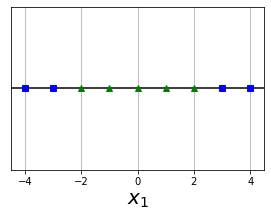

In [33]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y1d = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y1d==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y1d==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.show()

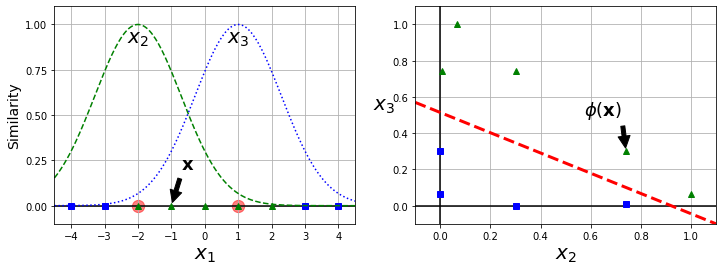

In [30]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

* 다항 특성 방식과 마찬가지로 위와 같은 유사도 특성 방식도 추가 특성 계산에 연산 비용이 많이 듦.
* 유사도 특성 방식도 SVM의 커널 트릭 사용 가능.

In [34]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

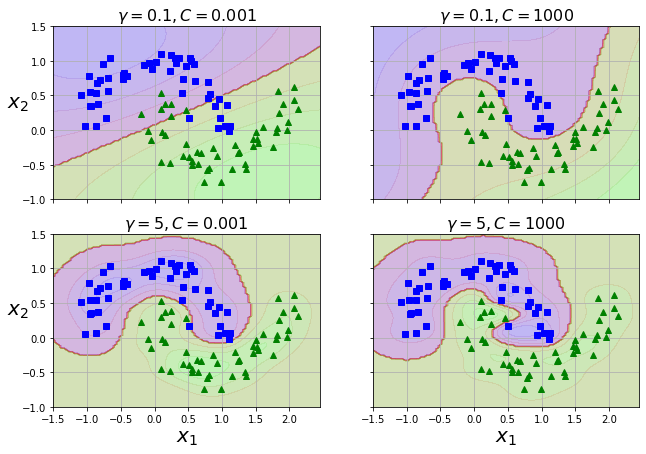

In [35]:
# 여러 gamma, C값에 따른 모델

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

> * $ \gamma $ 증가 시, 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아지고 결정 경계가 더 불규칙적이며 각 샘플을 따라 휘어짐.
> * $ \gamma $ 는 규제의 역할을 하며, 과대적합일 때 감소시키는 것이 좋음(C도 비슷한 역할을 하므로 함께 조절하는것이 좋음.)

* 일반적으로는 선형 커널을 먼저 시도하는 것이 좋음(특히 훈련 세트나 특성 수가 많을 때). 훈련 세트가 작거나 특성 수가 적으면 gaussian RBF 커널도 좋음. 

* LinearSVC는 커널 트릭을 지원하지는 않지만 훈련 샘플과 특성 수에 비례하여 시간 복잡도가 늘어남. 대략 $ O(m\times n) $
  * 정밀도를 높이면 수행 시간이 길어지고, 이는 하이퍼파라미터 $ \epsilon $ (scikitlearn에서는 <code>tol=</code>)으로 조절가능. 일반적으로 기본값으로 둘 때 잘 작동함.
* SVC의 시간복잡도는 보통 $ O(m^2 \times n) $ 과 $ O(m^3 \times n) $ 사이. 훈련 샘플 수가 커지면 매우 느려지므로 복잡하지만 작거나 중간 규모의 훈련 세트에 알맞고, 희소 특성(각 샘플에 0이 아닌 특성이 몇 개 없는 경우)인 경우 잘 확장됨.

|파이썬 클래스 |시간 복잡도                           |외부 메모리 학습 지원|스케일 조정의 필요성|커널 트릭|
|-------------|-------------------------------------|-------------------|-------------------|--------|
|LinearSVC    |$ O(m\times n) $                     |No                 |Yes                |No      |
|SGDClassifier|$ O(m\times n) $                     |Yes                |Yes                |No      |
|SVC          |$ O(m^2\times n)\sim O(m^3\times n) $|No                 |Yes                |Yes     |

### SVM 회귀

* SVM 분류의 목표를 반대로 하여 사용가능.
* 제한된 마진 오류(도로 밖의 샘플) 안에서, 도로 안에 가능한 많은 샘플이 들어가도록 학습.
* 도로의 폭은 하이퍼파라미터 $ \epsilon $ (<code>epsilon=</code>) 으로 조절.
* 마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없음($ \epsilon $ 에 민감하지 않다고 함.)

In [37]:
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

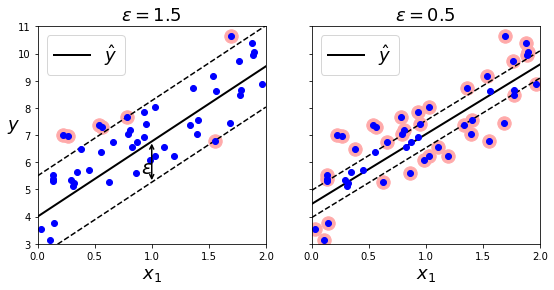

In [38]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)      # 선형 SVM 회귀
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

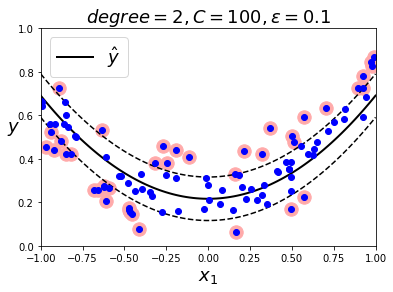

In [41]:
from sklearn.svm import SVR

m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)     # 비선형 SVM 회귀. 커널 SVM모델. 규제가 거의 없음(C가 큼.)
svm_poly_reg.fit(X, y)

plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg.degree, svm_poly_reg.C, svm_poly_reg.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.show()